## Electric Vehicle Population EDA

**Objectives** :  Analyze the Electric Vehicle (EV) dataset to uncover patterns, trends, and insights into EV sales and market. \
**Dataset** : Data collected from [data.gov](https://catalog.data.gov/dataset/electric-vehicle-population-data)
For more information about the dataset, referse to the [README file](../data/README.md).

#### Import Neccessory modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from camel_converter import to_snake

from dotenv import load_dotenv
load_dotenv()

import os
PROJECT_DIR = os.getenv("PROJECT_DIR")

# data cleaning helper scirpt 
import sys
sys.path.append(f"{PROJECT_DIR}/eda-and-visualization/EV-vechicle/scripts")

#### First in First

##### read dataset

In [2]:
df = pd.read_csv(f"{PROJECT_DIR}/eda-and-visualization/EV-vechicle/data/ev_population.csv")

##### dataset lookup

In [3]:
df.sample(2)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
90264,1FTVW3LKXR,King,Redmond,WA,98053.0,2024,FORD,F-150,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,45.0,270680910,POINT (-122.030684 47.669552),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
202662,5YJ3E1EC7M,King,Seattle,WA,98125.0,2021,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,46.0,252765110,POINT (-122.304356 47.715668),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205439 entries, 0 to 205438
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         205439 non-null  object 
 1   County                                             205436 non-null  object 
 2   City                                               205436 non-null  object 
 3   State                                              205439 non-null  object 
 4   Postal Code                                        205436 non-null  float64
 5   Model Year                                         205439 non-null  int64  
 6   Make                                               205439 non-null  object 
 7   Model                                              205438 non-null  object 
 8   Electric Vehicle Type                              205439 non-null  object

In [5]:
print(f"Dataframe contain {df.shape[0]} rows & {df.shape[1]} columns")

Dataframe contain 205439 rows & 17 columns


In [6]:
df.describe().T    # summary statistics about numerical cols

,count,mean,std,min,25%,50%,75%,max
Postal Code,205436.0,9.817797e+04,2.419037e+03,1.731000e+03,9.805200e+04,9.812500e+04,9.837200e+04,9.957700e+04
Model Year,205439.0,2.020960e+03,2.989059e+00,1.997000e+03,2.019000e+03,2.022000e+03,2.023000e+03,2.025000e+03
Electric Range,205431.0,5.216434e+01,8.807586e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.800000e+01,3.370000e+02
Base MSRP,205431.0,9.226705e+02,7.761754e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.450000e+05
Legislative District,204997.0,2.897085e+01,1.491005e+01,1.000000e+00,1.700000e+01,3.300000e+01,4.200000e+01,4.900000e+01
DOL Vehicle ID,205439.0,2.277156e+08,7.205737e+07,4.469000e+03,1.935324e+08,2.382368e+08,2.618718e+08,4.792548e+08
2020 Census Tract,205436.0,5.297704e+10,1.588435e+09,1.001020e+09,5.303301e+10,5.303303e+10,5.305307e+10,5.602100e+10


In [7]:
df.describe(include="object").T   # summary statistics of catagorical variable

,count,unique,top,freq
VIN (1-10),205439,12140,7SAYGDEE6P,1221
County,205436,205,King,105237
City,205436,770,Seattle,33328
State,205439,45,WA,204997
Make,205439,42,TESLA,90318
Model,205438,152,MODEL Y,43437
Electric Vehicle Type,205439,2,Battery Electric Vehicle (BEV),161539
Clean Alternative Fuel Vehicle (CAFV) Eligibility,205439,3,Eligibility unknown as battery range has not b...,114172
Vehicle Location,205431,928,POINT (-122.1207376 47.6705374),5203
Electric Utility,205436,74,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),75156


#### Data cleaning

##### Drop unwanted columns

In [8]:
df.sample()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
118137,5UXTA6C09P,Snohomish,Snohomish,WA,98296.0,2023,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30.0,0.0,44.0,218854058,POINT (-122.121841 47.841036),PUGET SOUND ENERGY INC,5.306105e+10


In [9]:
unwanted_cols = ["VIN (1-10)", "DOL Vehicle ID", "2020 Census Tract", "Legislative District", "Postal Code", \
                 "Vehicle Location"]
# new df without unwanted columns
df = df.drop(columns=unwanted_cols, axis=1)

In [10]:
df.sample()

,County,City,State,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Electric Utility
38478,King,Redmond,WA,2022,RIVIAN,R1T,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)


##### Rename column names

In [11]:
map_cols = {
    "Electric Vehicle Type" : "type",
    "Clean Alternative Fuel Vehicle (CAFV) Eligibility" : "cafv eligibility"}

# replace large column names with meaningfull names
df = df.rename(columns=map_cols)

In [12]:
# change all column name into snake_case format
df.columns = [to_snake("_".join(each.lower().split(" "))) for each in df.columns]

In [13]:
df.sample()

,county,city,state,model_year,make,model,type,cafv_eligibility,electric_range,base_msrp,electric_utility
98607,Whatcom,Bellingham,WA,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM CO...


##### Handle invalid data points

In [14]:
for each in df.columns:
    print(each)
    print(df[each].unique())
    print("*" * 100)

county
['Kitsap' 'King' 'Thurston' 'Snohomish' 'Yakima' 'Island' 'Skagit'
 'Spokane' 'Clallam' 'Chelan' 'Walla Walla' 'Kittitas' 'Whitman' 'Stevens'
 'Grant' 'Douglas' 'Clark' 'Cowlitz' 'Jefferson' 'Klickitat' 'Pierce'
 'Franklin' 'Whatcom' 'San Juan' 'Columbia' 'Grays Harbor' 'Lewis'
 'Benton' 'Pacific' 'Mason' 'Platte' 'Monterey' 'Wahkiakum' 'Norfolk'
 'Okanogan' 'Cumberland' 'Skamania' "Prince George's" 'Garfield'
 'Pend Oreille' 'Asotin' 'Lincoln' 'Adams' 'San Diego' 'Oldham' 'York'
 'Orange' 'Wake' 'Los Angeles' 'Sonoma' 'Ferry' 'Churchill' 'DeKalb'
 'Goochland' 'Stafford' 'Contra Costa' 'Riverside' 'Loudoun' 'Allen'
 'James City' 'Anne Arundel' 'Madison' 'Isle of Wight' 'Leavenworth'
 'Charles' 'Sarpy' 'Kings' 'Ventura' 'San Mateo' 'Sacramento' 'Maui' nan
 'Ada' 'Mobile' 'District of Columbia' 'New York' 'Multnomah' 'Fairfax'
 'Wichita' 'El Paso' 'Honolulu' 'Maricopa' 'Montgomery' 'Hillsborough'
 'Doña Ana' 'Autauga' 'Berkeley' 'Escambia' 'Polk' 'Charleston' 'Hamilton'
 'Mercer' 

In [15]:
df['base_msrp'] = df['base_msrp'].replace({0 : np.nan})
df['electric_range'] = df['electric_range'].replace({0 : np.nan})

- There are no invalid data points

##### Handle Null values

In [16]:
df.isna().mean() * 100     # columns percentage of missing values

county               0.001460
city                 0.001460
state                0.000000
model_year           0.000000
make                 0.000000
model                0.000487
type                 0.000000
cafv_eligibility     0.000000
electric_range      55.578542
base_msrp           98.385409
electric_utility     0.001460
dtype: float64

In [17]:
df = df.drop(columns=["base_msrp", "electric_range"])    
# drop columns which have large null values,
# we lost 2 important varibales, we dont have another option here
# when we try to impute the null values it change the data

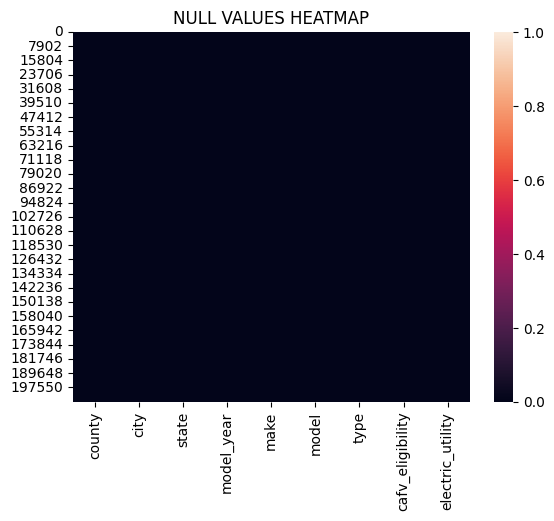

In [18]:
plt.title("NULL VALUES HEATMAP")
sns.heatmap(data=df.isna())
plt.show()

- there is very small size of missing values, so we can drop it

In [19]:
df = df.dropna(how="any", axis=0)    # it remove entire rows when it contain any of NaN values

In [20]:
df.isna().sum()

county              0
city                0
state               0
model_year          0
make                0
model               0
type                0
cafv_eligibility    0
electric_utility    0
dtype: int64

In [21]:
df.shape

(205435, 9)

##### Confirm Data-Type

In [22]:
df.dtypes

county              object
city                object
state               object
model_year           int64
make                object
model               object
type                object
cafv_eligibility    object
electric_utility    object
dtype: object

In [23]:
df.sample()

,county,city,state,model_year,make,model,type,cafv_eligibility,electric_utility
128813,Pierce,Lakewood,WA,2013,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...


#### Exploratory Data Analysis

ANALYSIS ABOUT:
1. Which Makers lead the EV car industry in US
2. Which is the best model in 2024 in US
3. which US county has the best EV makers
4. Top 5 Premium Model & its Makers
5. Who make most BEV EV's